In [8]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import torch
from PIL import Image
from pytorch_lightning import seed_everything
import torch.utils.checkpoint
import warnings 

from model_lib.utils import parse_args
from model_lib.modules import MoMA_main_modal
warnings.filterwarnings('ignore') 

In [2]:
seed_everything(0)
args = parse_args()

args.device = torch.device("cuda", 0)

Seed set to 0


In [3]:
# if you have 22 Gb GPU memory:
args.load_8bit, args.load_4bit = False, False

# if you have 18 Gb GPU memory:
# args.load_8bit, args.load_4bit = True, False

# if you have 14 Gb GPU memory:
# args.load_8bit, args.load_4bit = False, True

In [5]:
#load MoMA from HuggingFace. Auto download
moMA_main_modal = MoMA_main_modal(args).to(args.device, dtype=torch.bfloat16)

# This will automatically download the following files:
# - VAE: stabilityai--sd-vae-ft-mse
# - StableDiffusion: Realistic_Vision_V4.0
# - MoMA: 
#     - the-Multi modal LLM: MoMA_llava_7b (based on LLaVA 7b)
#     - the attentions and LLM mappings: attn_adapters_projectors.th


# It could take a while to download these models, if it is the first time running this code... 
# so please be patient...

Loading VAE: stabilityai--sd-vae-ft-mse...
Loading StableDiffusion: Realistic_Vision...
Loading pipeline components...: 100%|██████████| 5/5 [00:35<00:00,  7.07s/it]
Loading MoMA: its Multi-modal LLM...
Loading checkpoint shards: 100%|██████████| 2/2 [02:07<00:00, 63.51s/it]


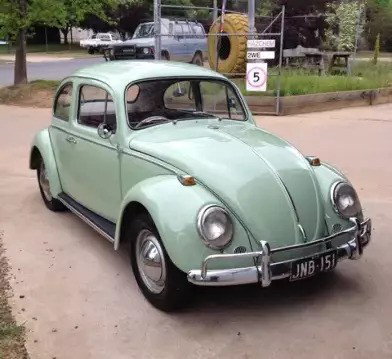

In [5]:
# reference image
rgb_path = "example_images/newImages/3.jpg"
mask_path = "example_images/newImages/3_mask.jpg"
subject = 'car'

num = 3 # generate 3 images
Image.open(rgb_path).convert("RGB")


100%|██████████| 50/50 [00:12<00:00,  4.14it/s]


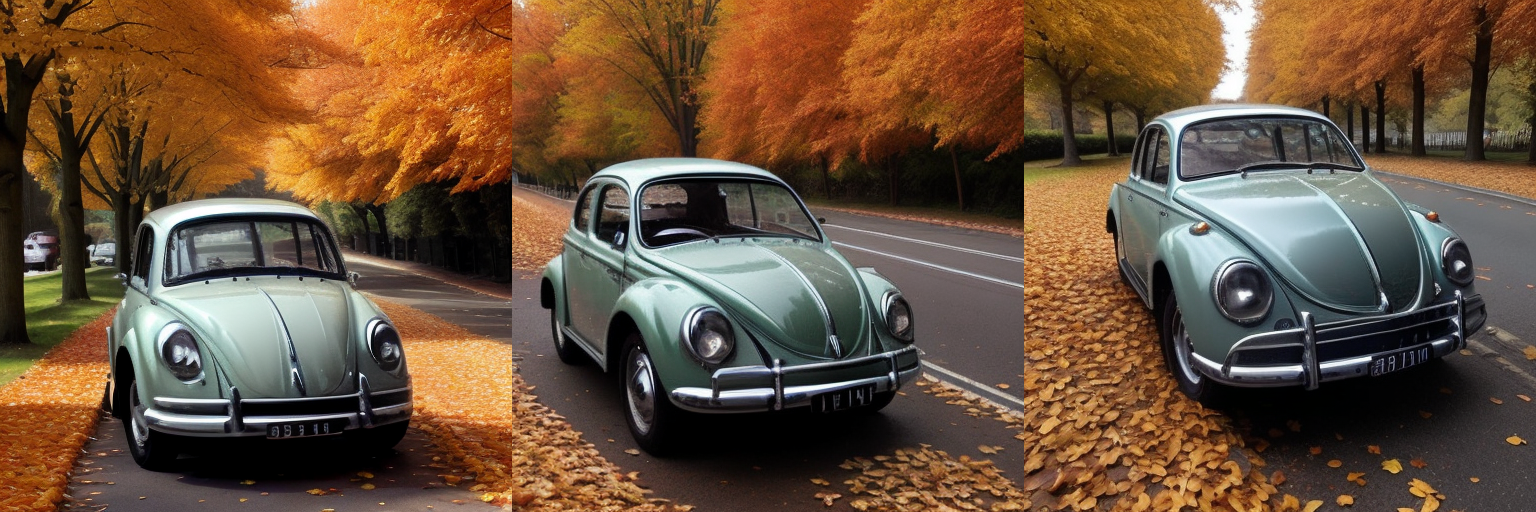

In [6]:
################ change context ##################
prompt = "A car in autumn with falling leaves."
generated_image = moMA_main_modal.generate_images(rgb_path, mask_path, subject, prompt, strength=1.0,  num=num, seed=0, return_mask=False)  # set strength to 1.0 for more accurate details

# (show image)
generated_image


100%|██████████| 50/50 [00:12<00:00,  4.12it/s]


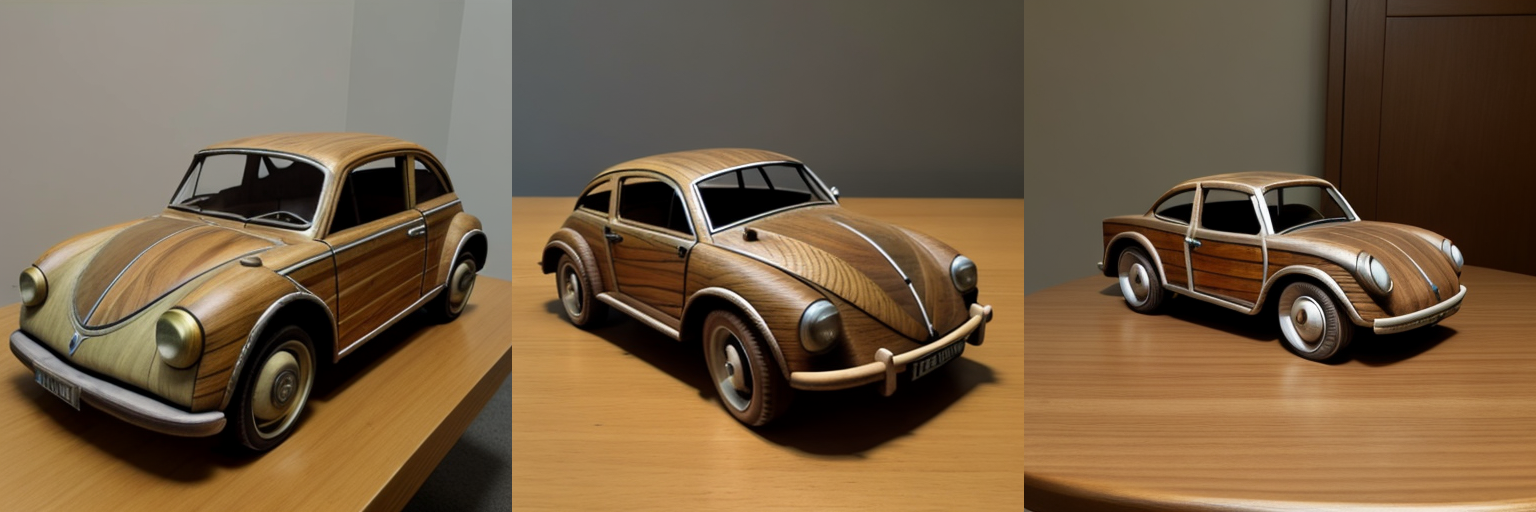

In [7]:
################ change texture ##################
prompt = "A wooden sculpture of a car on the table."
generated_image = moMA_main_modal.generate_images(rgb_path, mask_path, subject, prompt, strength=0.4,  num=num, seed=4, return_mask=False)  # set strength to 0.4 for better prompt fidelity

# (show image)
generated_image

### Thank you for your attention

+ Project page: https://moma-adapter.github.io/
+ Arxiv page: https://arxiv.org/abs/2404.05674
+ HuggingFace repository: https://huggingface.co/KunpengSong/MoMA_llava_7b/tree/main